In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from datetime import date,datetime
import plotly.graph_objects as go
from matplotlib import pyplot as plt
from matplotlib.dates import DateFormatter
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
#dfg = shp.Reader("arunachalpradesh_district.shp")
df = pd.read_csv("state_level_daily.csv")
#df2 = pd.read_csv("tests_day_wise.csv")
df1 = pd.read_csv("complete.csv")
#df2 = pd.read_csv("tests_day_wise.csv")
df2 = pd.read_csv("statewise_tested_numbers_data.csv")
#df = gpd.read_file("india_district.shp") statewise_tested_numbers_data.csv
#df.head(400)
#fig, ax = plt.subplots(figsize=(10,10))    

In [2]:
#df2.head()
df1.head()

,Date,Name of State / UT,Latitude,Longitude,Total Confirmed cases,Death,Cured/Discharged/Migrated,New cases,New deaths,New recovered
0,2020-01-30,Kerala,10.8505,76.2711,1,0,0,0,0,0
1,2020-01-31,Kerala,10.8505,76.2711,1,0,0,0,0,0
2,2020-02-01,Kerala,10.8505,76.2711,2,0,0,1,0,0
3,2020-02-02,Kerala,10.8505,76.2711,3,0,0,1,0,0
4,2020-02-03,Kerala,10.8505,76.2711,3,0,0,0,0,0


In [3]:
df1=df1.drop(["New cases","New deaths","New recovered"],axis=1)
df1=df1.rename(columns={"Name of State / UT":"State","Total Confirmed cases":"Tot_Cases","Cured/Discharged/Migrated":"Recovered"})
df['Date']=pd.to_datetime(df['Date'],format='%d-%b-%y')
df1['Date']=pd.to_datetime(df1['Date'],format='%Y-%m-%d')
df2['Updated On']=pd.to_datetime(df2['Updated On'],format='%d/%m/%Y')
date_from = pd.Timestamp(date(2020,6,1))
#date_to = pd.Timestamp(date(2020,6,30))
df_filtered = df[(df['State_Name']=="Arunachal Pradesh") & (df['Date']>=date_from) ]
df_testing = df2[(df2['State']=="Arunachal Pradesh") & (df2['Updated On']>=date_from) ]
df_complete = df1[(df1['State']=="Arunachal Pradesh") & (df1['Date']>=date_from) ]
#df_hosp=df1[df1['State/UT']=="Arunachal Pradesh"]
#df_pop=df1[df1['Name of State / UT']=="Arunachal Pradesh"]

In [4]:
df_filtered.head()
#df_testing.head()
#df_pop.head()

,Unnamed: 0,Date,State,Confirmed,Deceased,Recovered,State_Name
41,41,2020-07-01,AR,4,0,4,Arunachal Pradesh
80,80,2020-06-01,AR,18,0,0,Arunachal Pradesh
197,197,2020-07-02,AR,37,0,5,Arunachal Pradesh
236,236,2020-06-02,AR,2,0,0,Arunachal Pradesh
353,353,2020-07-03,AR,20,0,4,Arunachal Pradesh


In [5]:
#df_filtered.shape
df_filtered=df_filtered.drop(["Unnamed: 0","State"], axis=1)
#df_filtered=df_filtered.rename(columns={"State/UnionTerritory":"State"})
df_testing=df_testing.drop(["Tag (Total Tested)","Negative","Unconfirmed","Cumulative People In Quarantine","Total People Currently in Quarantine",
                     "Corona Enquiry Calls","Num Calls State Helpline","Source1","Source2","Unnamed: 22","Test positivity rate","Tests per thousand",
                     "Tests per million","Tests per positive case"], axis=1)
#df_hosp=df_hosp.rename(columns={"State/UT":"State","TotalPublicHealthFacilities_HMIS":"Hospitals","NumPublicBeds_HMIS":"Beds"})
#df_pop=df_pop.drop(["Sno","Rural population","Urban population","Area","Density","Gender Ratio"], axis=1)
#df_pop=df_pop.rename(columns={"State / Union Territory":"State"})
#df_filtered.pct_change()
#df_filtered

In [6]:
df_filtered.head()

,Date,Confirmed,Deceased,Recovered,State_Name
41,2020-07-01,4,0,4,Arunachal Pradesh
80,2020-06-01,18,0,0,Arunachal Pradesh
197,2020-07-02,37,0,5,Arunachal Pradesh
236,2020-06-02,2,0,0,Arunachal Pradesh
353,2020-07-03,20,0,4,Arunachal Pradesh


In [7]:
df_testing.head()

,Updated On,State,Total Tested,Positive,Tag (People in Quarantine),Total People Released From Quarantine,People in ICU,People on Ventilators,Num Isolation Beds,Num ICU Beds,Num Ventilators,Total PPE,Total N95 Masks,Population NCP 2019 Projection
195,2020-06-01,Arunachal Pradesh,8768.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1504000.0
196,2020-06-02,Arunachal Pradesh,9079.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1504000.0
197,2020-06-03,Arunachal Pradesh,9551.0,38.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1504000.0
198,2020-06-04,Arunachal Pradesh,10025.0,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1504000.0
199,2020-06-05,Arunachal Pradesh,10790.0,46.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1504000.0


In [8]:
#df_filtered.shape
#df_filtered=df_filtered.drop(["Sno","Time","ConfirmedIndianNational","ConfirmedForeignNational"], axis=1)
#df_filtered=df_filtered.rename(columns={"State/UnionTerritory":"State"})
df_testing=df_testing.drop(["Positive","Tag (People in Quarantine)","Total People Released From Quarantine","People in ICU",
                     "People on Ventilators","Num Isolation Beds","Num ICU Beds","Num Ventilators","Total PPE",
                            "Total N95 Masks"], axis=1)
df_testing=df_testing.rename(columns={"Population NCP 2019 Projection":"Population","Updated On":"Date","Total Tested":"Tests"})
df_filtered=df_filtered.rename(columns={"State_Name":"State"})
#df_pop=df_pop.drop(["Sno","Rural population","Urban population","Area","Density","Gender Ratio"], axis=1)
#df_pop=df_pop.rename(columns={"State / Union Territory":"State"})
#df_filtered.pct_change()
#df_filtered

In [9]:
df_testing.head()

,Date,State,Tests,Population
195,2020-06-01,Arunachal Pradesh,8768.0,1504000.0
196,2020-06-02,Arunachal Pradesh,9079.0,1504000.0
197,2020-06-03,Arunachal Pradesh,9551.0,1504000.0
198,2020-06-04,Arunachal Pradesh,10025.0,1504000.0
199,2020-06-05,Arunachal Pradesh,10790.0,1504000.0


In [10]:

df_filtered.head()

,Date,Confirmed,Deceased,Recovered,State
41,2020-07-01,4,0,4,Arunachal Pradesh
80,2020-06-01,18,0,0,Arunachal Pradesh
197,2020-07-02,37,0,5,Arunachal Pradesh
236,2020-06-02,2,0,0,Arunachal Pradesh
353,2020-07-03,20,0,4,Arunachal Pradesh


In [11]:
df_filtered=pd.merge(df_filtered, df_testing, on=['State','Date'] , how='left')
df_filtered=pd.merge(df_complete,df_filtered,  on=['State','Date'] , how='left')

In [12]:

df_filtered.sort_values(by=['Date'],inplace=True)
#df_filtered

In [13]:
df_filtered['Active']=df_filtered['Tot_Cases']-df_filtered['Death']-df_filtered['Recovered_x']
#df_filtered=df_filtered.assign(Active=active)
#df_filtered

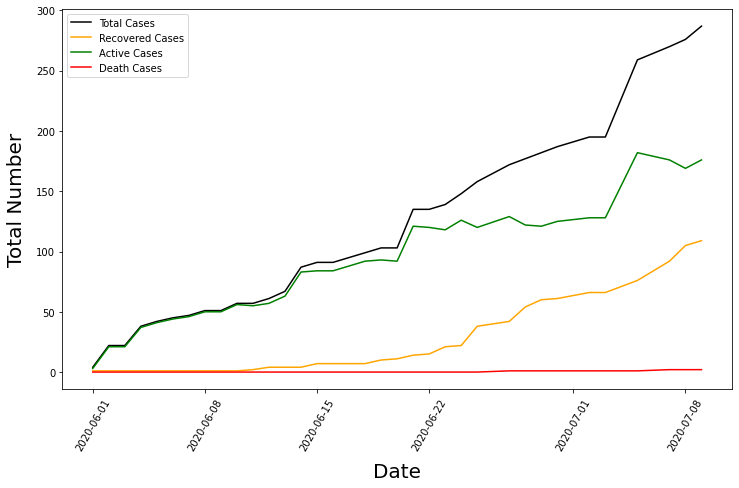

In [14]:
plt.figure(figsize=(12, 7)) 
plt.plot(df_filtered.Date,df_filtered.Tot_Cases,color='k',label='Total Cases')
plt.plot(df_filtered.Date,df_filtered.Recovered_x,color='orange',label='Recovered Cases')
plt.plot(df_filtered.Date,df_filtered.Active,color='green',label='Active Cases')
plt.plot(df_filtered.Date,df_filtered.Death,color='red',label='Death Cases')
plt.xticks(rotation=60)
plt.xlabel("Date",labelpad=10,fontsize=20)
plt.ylabel("Total Number",labelpad=10,fontsize=20)
plt.legend()

plt.show()

In [15]:
md=df_filtered.isnull()

In [16]:
for column in md.columns.values.tolist():
    print(column)
    print (md[column].value_counts())
    print("") 

Date
False    35
Name: Date, dtype: int64

State
False    35
Name: State, dtype: int64

Latitude
False    35
Name: Latitude, dtype: int64

Longitude
False    35
Name: Longitude, dtype: int64

Tot_Cases
False    35
Name: Tot_Cases, dtype: int64

Death
False    35
Name: Death, dtype: int64

Recovered_x
False    35
Name: Recovered_x, dtype: int64

Confirmed
False    34
True      1
Name: Confirmed, dtype: int64

Deceased
False    34
True      1
Name: Deceased, dtype: int64

Recovered_y
False    34
True      1
Name: Recovered_y, dtype: int64

Tests
False    33
True      2
Name: Tests, dtype: int64

Population
False    31
True      4
Name: Population, dtype: int64

Active
False    35
Name: Active, dtype: int64



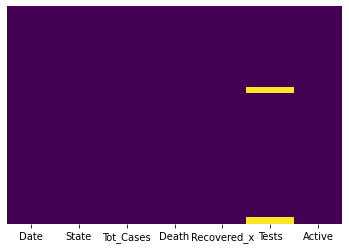

In [17]:
hm_df=df_filtered.drop(["Latitude","Longitude","Population","Confirmed","Deceased","Recovered_y"], axis=1)
sns.heatmap(hm_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')



In [18]:

hm_df['Tests'] = hm_df['Tests'].fillna(hm_df['Tests'].mean())

#hm_df['Population'] = hm_df['Population'].fillna(hm_df['Population'].mean())

In [19]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 10


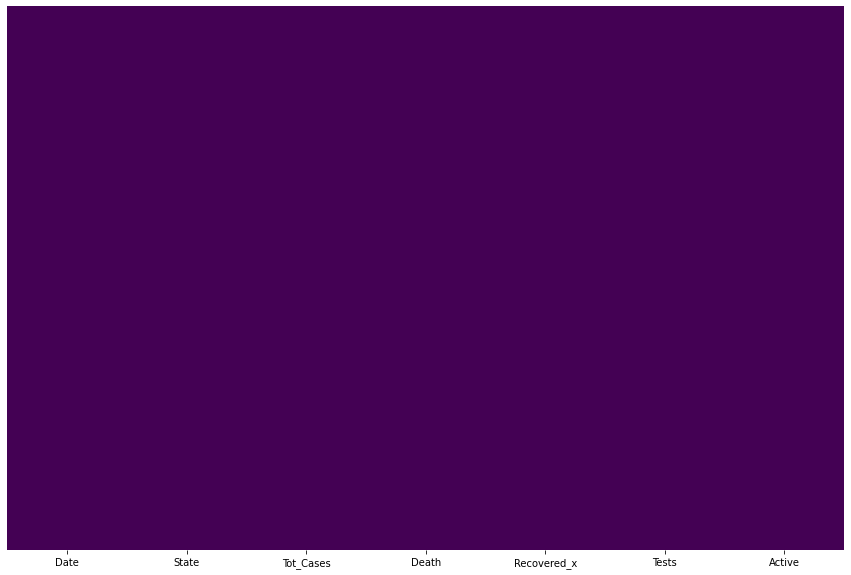

In [20]:
sns.heatmap(hm_df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [21]:
hm_df['Mor_Rate'] = (hm_df['Death']/hm_df['Tot_Cases']).round(2)
hm_df['Rec_Rate'] = (hm_df['Recovered_x']/hm_df['Tot_Cases']).round(2)

In [22]:
hm_df.head()

,Date,State,Tot_Cases,Death,Recovered_x,Tests,Active,Mor_Rate,Rec_Rate
0,2020-06-01,Arunachal Pradesh,4,0,1,8768.0,3,0.0,0.25
1,2020-06-02,Arunachal Pradesh,22,0,1,9079.0,21,0.0,0.05
2,2020-06-03,Arunachal Pradesh,22,0,1,9551.0,21,0.0,0.05
3,2020-06-04,Arunachal Pradesh,38,0,1,10025.0,37,0.0,0.03
4,2020-06-05,Arunachal Pradesh,42,0,1,10790.0,41,0.0,0.02


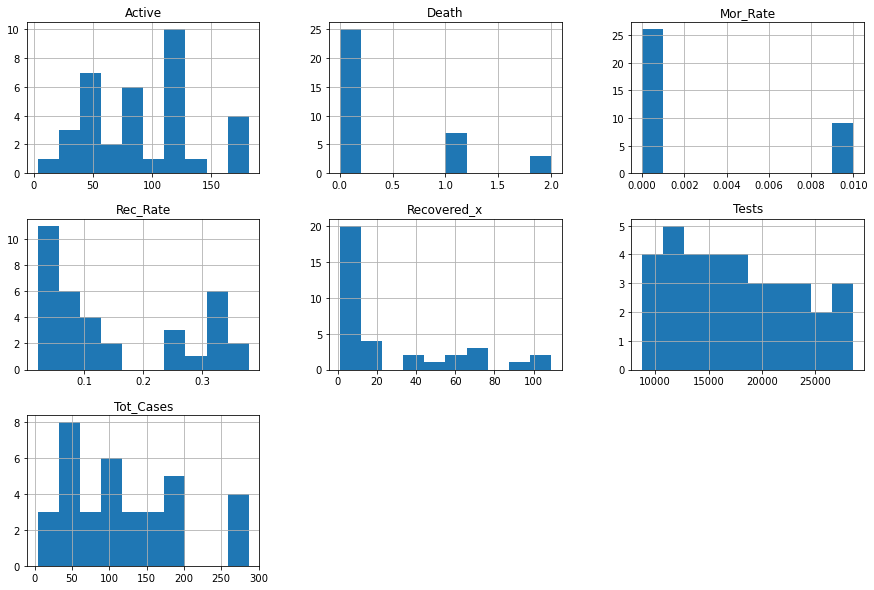

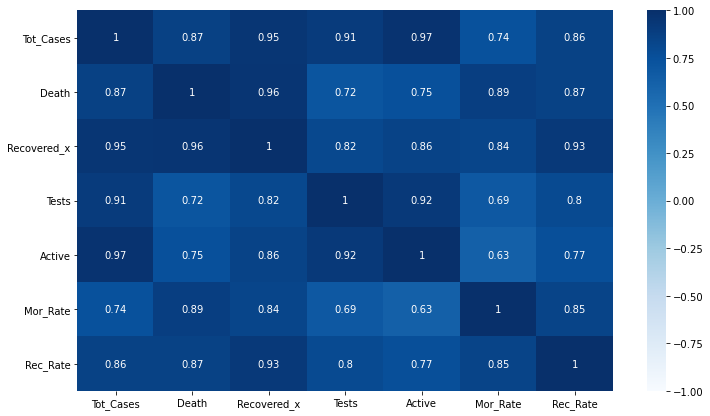

In [23]:
hm_df.hist()
Var_Corr = hm_df.corr()
#Var_Corr =df_filtered.corr(method ='pearson') 
# plot the heatmap and annotation on it

plt.figure(figsize=(12, 7))    
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True, vmin=-1, vmax=1, center= 0,cmap='Blues')

In [26]:

df_lr = hm_df.drop(['State','Death','Tests','Active','Date'], axis='columns')




In [27]:
forecast_out=15
#df1['prediction']=df1[['Recovered']].shift(-1)
df_lr['prediction_cnfm']=df_lr[['Tot_Cases']].shift(-forecast_out)
df_lr['prediction_rec']=df_lr[['Recovered_x']].shift(-forecast_out)
print(df_lr.tail())

    Tot_Cases  Recovered_x  Mor_Rate  Rec_Rate  prediction_cnfm  \
30        195           66      0.01      0.34              NaN   
31        259           76      0.00      0.29              NaN   
32        270           92      0.01      0.34              NaN   
33        276          105      0.01      0.38              NaN   
34        287          109      0.01      0.38              NaN   

    prediction_rec  
30             NaN  
31             NaN  
32             NaN  
33             NaN  
34             NaN  


In [32]:
X=np.array(df_lr.drop(['prediction_cnfm','prediction_rec','Recovered_x','Mor_Rate','Rec_Rate'],1))
X=X[:-forecast_out]
print(X)

[[  4]
 [ 22]
 [ 22]
 [ 38]
 [ 42]
 [ 45]
 [ 47]
 [ 51]
 [ 51]
 [ 57]
 [ 57]
 [ 61]
 [ 67]
 [ 87]
 [ 91]
 [ 91]
 [ 95]
 [ 99]
 [103]
 [103]]


In [33]:
y=np.array(df_lr['Recovered_x'])
y=y[:-forecast_out]
print(y)

[ 1  1  1  1  1  1  1  1  1  1  2  4  4  4  7  7  7  7 10 11]


In [34]:
#from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [35]:
lr_xfm=LinearRegression()
lr_xfm.fit(x_train,y_train)

LinearRegression()

In [48]:
lr_scr=lr_xfm.score(x_test,y_test)
print("Linear Regression confidence:",lr_scr)

Linear Regression confidence: 0.31097711207418277


In [49]:
x_forecast=np.array(df_lr.drop(['prediction_cnfm','prediction_rec'],1))[-forecast_out:]
print(x_forecast)

[[1.35e+02 1.40e+01 0.00e+00 1.00e-01]
 [1.35e+02 1.50e+01 0.00e+00 1.10e-01]
 [1.39e+02 2.10e+01 0.00e+00 1.50e-01]
 [1.48e+02 2.20e+01 0.00e+00 1.50e-01]
 [1.58e+02 3.80e+01 0.00e+00 2.40e-01]
 [1.72e+02 4.20e+01 1.00e-02 2.40e-01]
 [1.77e+02 5.40e+01 1.00e-02 3.10e-01]
 [1.82e+02 6.00e+01 1.00e-02 3.30e-01]
 [1.87e+02 6.10e+01 1.00e-02 3.30e-01]
 [1.95e+02 6.60e+01 1.00e-02 3.40e-01]
 [1.95e+02 6.60e+01 1.00e-02 3.40e-01]
 [2.59e+02 7.60e+01 0.00e+00 2.90e-01]
 [2.70e+02 9.20e+01 1.00e-02 3.40e-01]
 [2.76e+02 1.05e+02 1.00e-02 3.80e-01]
 [2.87e+02 1.09e+02 1.00e-02 3.80e-01]]


In [50]:


#To retrieve the intercept:
print(lr_xfm.intercept_)
#For retrieving the slope:
print(lr_xfm.coef_)



-2.184311914920717
[0.09722664]


In [52]:
y_pred = lr_xfm.predict(x_test)

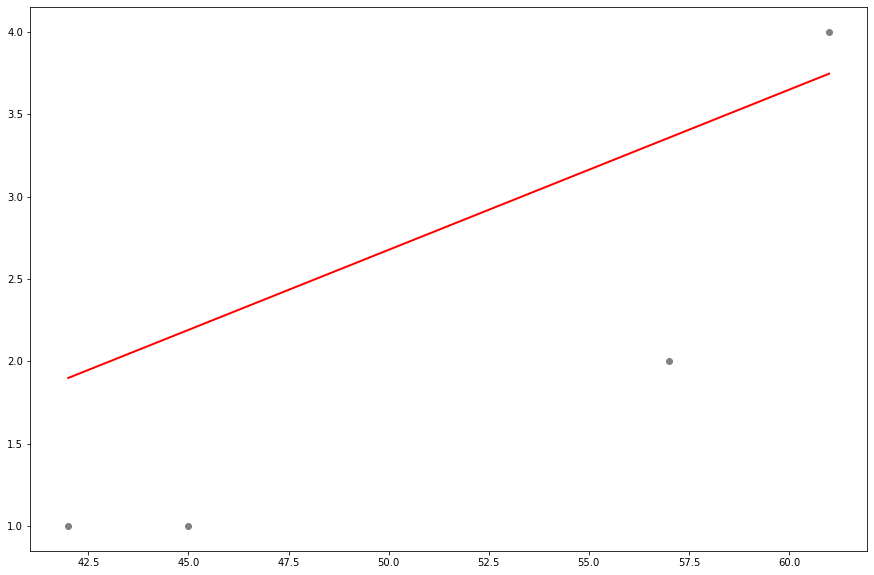

In [55]:
plt.scatter(x_test, y_test,  color='gray')
plt.plot(x_test, y_pred, color='red', linewidth=2)
plt.show()

In [ ]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

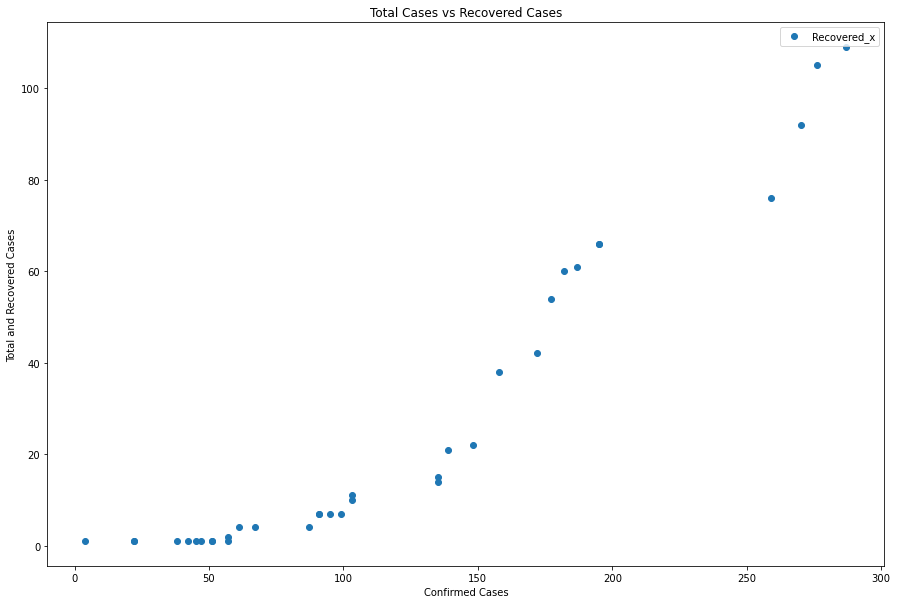

In [44]:
hm_df.plot(x='Tot_Cases', y=['Recovered_x'], style='o')  
plt.title('Total Cases vs Recovered Cases')  
plt.xlabel('Confirmed Cases')  
plt.ylabel('Total and Recovered Cases')  
plt.show()